# using non-labeled images:

We will test our trained model on unlabeled images from our image folder, loading the saved file to avoid training a new one.

In [4]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import random
from keras import models

In [5]:
#path="C:\\Users\\chris\\Documents\\Assignment5\\img-classs"
path="C:\\tareas\\2023\\sistemas inteligentes\\tarea 5\\scenarioDetection\\img-classs"

In [17]:
pathToImagesPred=path+"\\seg_pred\\seg_pred"
classes=['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [7]:
def resizeImages(imagesArray,dim=128):
    newArray=[]
    for image in imagesArray:
        newArray.append(cv2.resize(image, (dim, dim)))
    return newArray

def convertImgsGScale(imagesArray):
    newArray=[]
    for image in imagesArray:
        newArray.append(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
    return newArray

In [8]:
def getImagesFromAFolder(imgDirectory,resize=False,resizeSize=128,gray=False):
    imgArray=[]
    for img in os.listdir(imgDirectory):
        image=cv2.imread(os.path.join(imgDirectory,img))
        imgDim = cv2.resize(image, (150, 150))
        imgArray.append(imgDim)

    if (resize): imgArray= resizeImages(imgArray,resizeSize)
    if (gray): imgArray=convertImgsGScale(imgArray)
    print(np.array(imgArray).shape)
    return imgArray

In [9]:
def saveDataPickle(name,data):
    with open(name, 'wb') as file:
        pickle.dump(data, file)
        file.close()
def loadDataPickle(name):
    with open(name, 'rb') as file:
        data = pickle.load(file)
    return data

In [10]:
def getImagesWithoutLabels(pathToImages,resize=False,resizeSize=128,gray=False):
    totalImgs=0
    channels = 3
    if (gray):
        channels=1
    X = []
    imgsFromClass=getImagesFromAFolder(pathToImages,True,resizeSize,False)
    totalImgs+=len(imgsFromClass)
    X.extend(imgsFromClass)
    X = np.array(X)
    X = X.reshape((totalImgs, resizeSize, resizeSize, channels))
    return (X)

In [11]:
X_Pred=getImagesWithoutLabels(pathToImages=pathToImagesPred,resize=True,resizeSize=128,gray=False)

(7301, 128, 128, 3)


In [12]:
#saveDataPickle('imagesProcessedPickles/xPred.Pickle',X_Pred)

In [13]:
X_Pred=loadDataPickle('imagesProcessedPickles/xPred.pickle')

In [14]:
newModel= models.load_model('SavedModels/modelRun9')

In [15]:
num_Images = 10
random.seed(42)
image_indices = random.sample(range(len(X_Pred)), num_Images)
images_to_predict = X_Pred[image_indices]

Generating random prediction
1/1 [==============================] - 0s 47ms/step
Predictions shape: (10, 6)
Prediction for image 1 : buildings


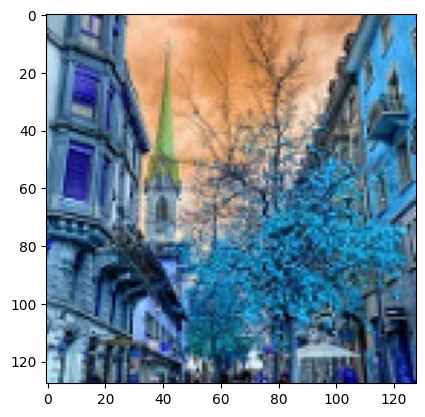

Prediction for image 2 : mountain


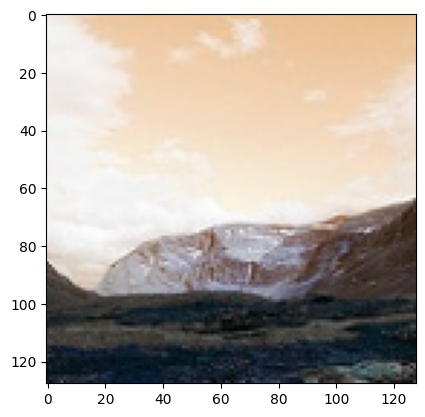

Prediction for image 3 : street


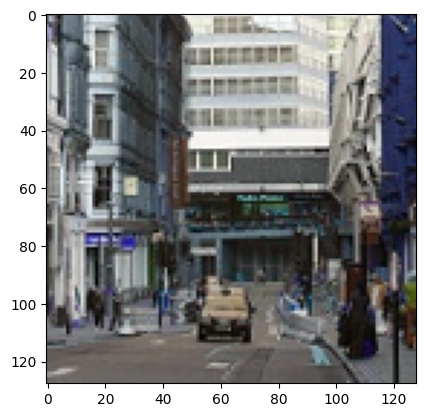

Prediction for image 4 : mountain


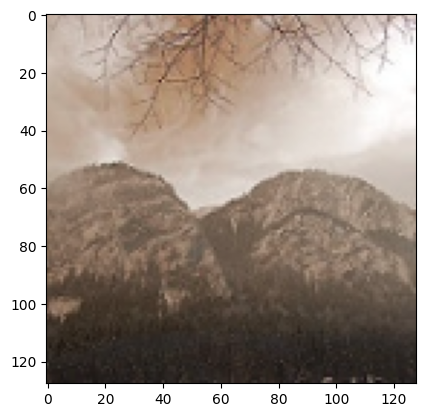

Prediction for image 5 : mountain


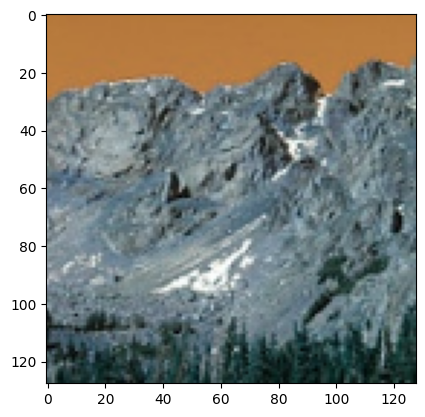

Prediction for image 6 : forest


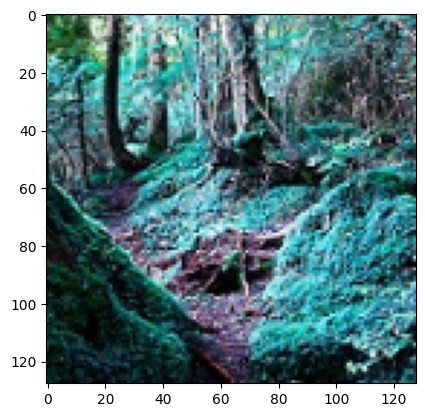

Prediction for image 7 : sea


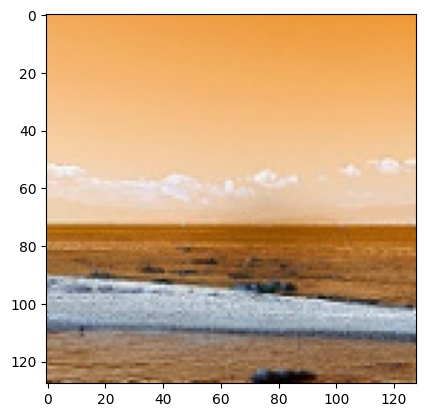

Prediction for image 8 : glacier


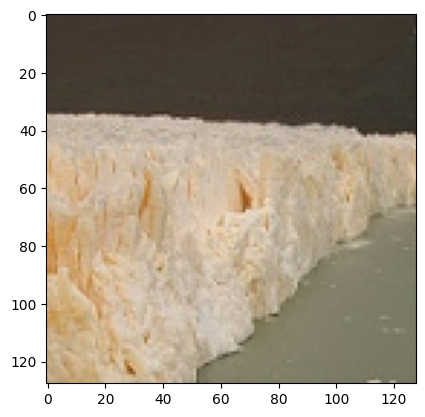

Prediction for image 9 : sea


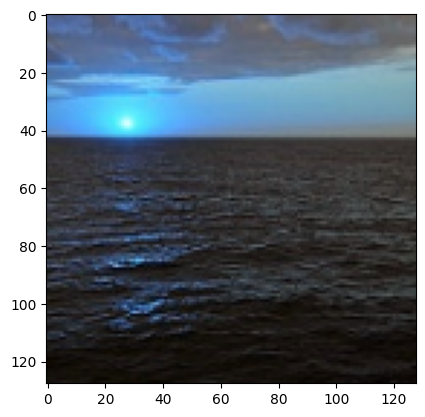

Prediction for image 10 : buildings


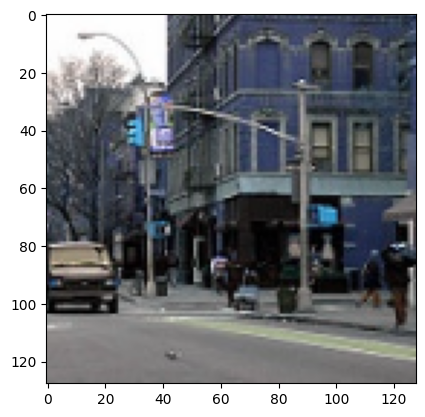

In [18]:
print("Generating random prediction")
predictions = newModel.predict(X_Pred[:num_Images])
print("Predictions shape:", predictions.shape)
for i in range(num_Images):
    print("Prediction for image", i+1, ":", classes[np.argmax(predictions[i])])
    plt.imshow(X_Pred[i])
    plt.show()

With this example, we demonstrated that it is not necessary to train a model from scratch to use it in a project, instead we can save the model in a pickle and call it where we need it. In this case, we used it to obtain 10 random images from our seg_pred folder and display which image our model is recognizing. Also we can see that the trained model works pretty good.